--- Dataset Head ---
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

--- Dataset Info & Null Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64


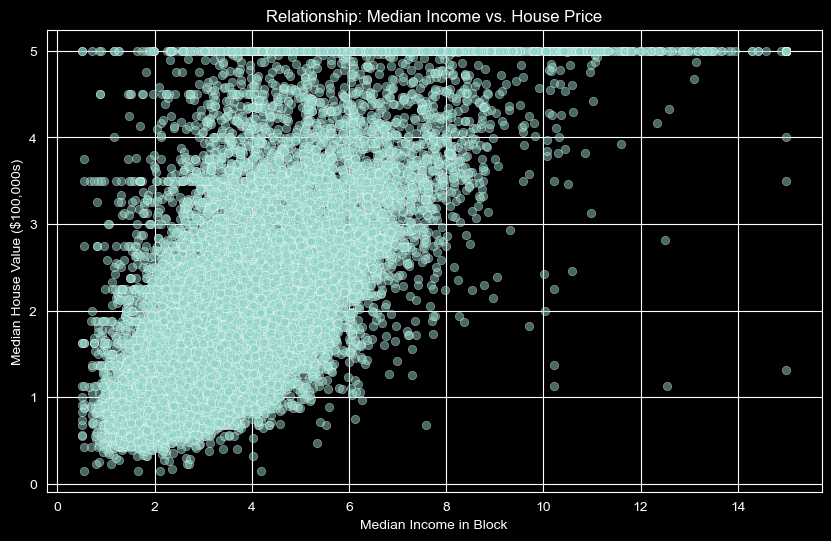

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# 1. Load the real-world dataset
housing_data = fetch_california_housing()

# 2. Create a DataFrame (Table format)
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df['Price'] = housing_data.target # Target variable (House Price)

# 3. Exploratory Data Analysis (EDA)
print("--- Dataset Head ---")
print(df.head())

print("\n--- Dataset Info & Null Values ---")
print(df.info())

print("\n--- Statistical Summary ---")
print(df.describe())

# 4. Visualization: Correlation between Income and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['MedInc'], y=df['Price'], alpha=0.5)
plt.title('Relationship: Median Income vs. House Price')
plt.xlabel('Median Income in Block')
plt.ylabel('Median House Value ($100,000s)')
plt.grid(True)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Feature selection (X) and Target (y)
X = df.drop('Price', axis=1)
y = df['Price']

# 2. Split into 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Evaluation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Model Results:")
print(f"R-squared Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

Model Results:
R-squared Score: 0.5758
Mean Squared Error: 0.5559


In [5]:
from sklearn.ensemble import RandomForestRegressor

# 1. Initialize the Random Forest Model
# n_estimators=100 means we will use 100 decision trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Make predictions
rf_y_pred = rf_model.predict(X_test)

# 4. Evaluate the new model
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)

print(f"Random Forest Results:")
print(f"New R-squared Score: {rf_r2:.4f}")
print(f"New Mean Squared Error: {rf_mse:.4f}")

Random Forest Results:
New R-squared Score: 0.8051
New Mean Squared Error: 0.2554


In [6]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error

# 1. Feature Engineering: Creating smarter features
X_train_ext = X_train.copy()
X_test_ext = X_test.copy()

# Ratio of rooms to household
X_train_ext['Rooms_per_HH'] = X_train_ext['AveRooms'] / X_train_ext['AveOccup']
X_test_ext['Rooms_per_HH'] = X_test_ext['AveRooms'] / X_test_ext['AveOccup']

# 2. Initialize XGBoost Regressor
# n_estimators: number of boosting rounds
# learning_rate: step size shrinkage
xgb_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, random_state=42)

# 3. Train the model
xgb_model.fit(X_train_ext, y_train)

# 4. Predict and Evaluate
xgb_pred = xgb_model.predict(X_test_ext)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

print(f"--- Improved Model (XGBoost) ---")
print(f"New R-squared Score: {xgb_r2:.4f}")
print(f"New Mean Squared Error: {xgb_mse:.4f}")

--- Improved Model (XGBoost) ---
New R-squared Score: 0.8508
New Mean Squared Error: 0.1956
